## CIFAR-10 Classification Using VGG16 CNN Model
### <u>About VGG16 Architecture</u>
- VGG model stands for the Visual Geometry Group
- VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman
- This model achieves 92.7% top-5 test accuracy on ImageNet dataset which contains 14 million images belonging to 1000 classes.
![Architecture](https://miro.medium.com/max/470/1*3-TqqkRQ4rWLOMX-gvkYwA.png)

In [ ]:
# Required Libraries
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)
warnings.filterwarnings("ignore")

2.4.1


In [ ]:
# Load Dataset
cifar = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

print(f'Training set: {X_train.shape}')
print(f'Testing set: {X_test.shape}')

170500096/170498071 [==============================] - 11s 0us/step
Training set: (50000, 32, 32, 3)
Testing set: (10000, 32, 32, 3)


In [ ]:
# One hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Plotting sample images using plt.imshow()
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',5:'dog',6:'frog', 7:'horse', 8:'ship', 9:'truck'}

def show_image(idx):
  index = y_train[idx][0]
  plt.figure(figsize=(1, 1))
  plt.xlabel(label_dict.get(index))
  plt.imshow(X_train[idx]);

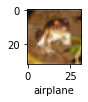

In [ ]:
show_image(0)

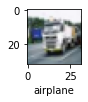

In [ ]:
show_image(1000)

- Not necessary to rescale images: https://stackoverflow.com/questions/56645556/image-size-issue-to-train-cifar-dateset-by-standard-mobilenet-vgg-16-or-alexnet

## Model
![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F5066898%2Fd56c89bbad2c59261b7c51c160e3d7b7%2FVGG16_Summary-Table.jpg?generation=1598797630439321&alt=media)

In [ ]:
# Input
input = tf.keras.Input(shape =(32, 32, 3))

# 1st Conv Block
x = tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 2nd Conv Block
x = tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 3rd Conv block
x = tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 4th Conv block
x = tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block
x = tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# Fully connected layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 4096, activation ='relu')(x)
x = tf.keras.layers.Dense(units = 4096, activation ='relu')(x)
output = tf.keras.layers.Dense(units = 10, activation ='softmax')(x)

# Creating the model
model = tf.keras.Model(input, outputs=output)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9), metrics = ["accuracy"])

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.15,horizontal_flip=True)
test_generator  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Training the Model
history = model.fit_generator(train_generator.flow(X_train, y_train, batch_size=100),
                              steps_per_epoch=X_train.shape[0] // 100,
                              validation_data=test_generator.flow(X_test, y_test, batch_size=100), 
                              epochs=100, verbose=1)

Epoch 1/100
500/500 [==============================] - 38s 42ms/step - loss: 2.3025 - accuracy: 0.1026 - val_loss: 2.3024 - val_accuracy: 0.1186
Epoch 2/100
500/500 [==============================] - 21s 42ms/step - loss: 2.3024 - accuracy: 0.1182 - val_loss: 2.3021 - val_accuracy: 0.1568
Epoch 3/100
500/500 [==============================] - 21s 42ms/step - loss: 2.3021 - accuracy: 0.1159 - val_loss: 2.3018 - val_accuracy: 0.1393
Epoch 4/100
500/500 [==============================] - 21s 41ms/step - loss: 2.3017 - accuracy: 0.1393 - val_loss: 2.3009 - val_accuracy: 0.1375
Epoch 5/100
500/500 [==============================] - 21s 42ms/step - loss: 2.3004 - accuracy: 0.1524 - val_loss: 2.2977 - val_accuracy: 0.1888
Epoch 6/100
500/500 [==============================] - 21s 42ms/step - loss: 2.2955 - accuracy: 0.1814 - val_loss: 2.2814 - val_accuracy: 0.1926
Epoch 7/100
500/500 [==============================] - 21s 42ms/step - loss: 2.2588 - accuracy: 0.1830 - val_loss: 2.1418 - val_ac

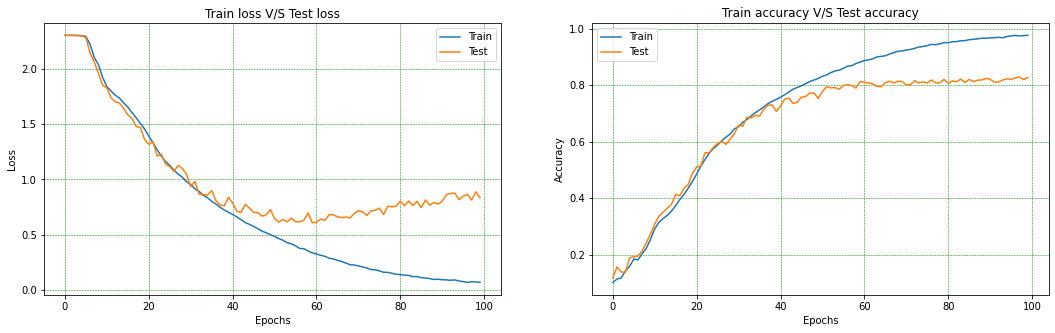

In [ ]:
training_history = pd.DataFrame(history.history)
training_history.columns = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy']

# Plotting Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

ax1.plot(training_history[['Train Loss', 'Test Loss']]);
ax1.title.set_text('Train loss V/S Test loss')
ax1.set_xlabel('Epochs');
ax1.set_ylabel('Loss');
ax1.legend('best', labels=['Train', 'Test']);
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5);

ax2.plot(training_history[['Train Accuracy', 'Test Accuracy']]);
ax2.title.set_text('Train accuracy V/S Test accuracy')
ax2.set_xlabel('Epochs');
ax2.set_ylabel('Accuracy');
ax2.legend('best', labels=['Train', 'Test']);
ax2.grid(color = 'green', linestyle = '--', linewidth = 0.5);

In [ ]:
# Evaluate the Model on the Test Data
model_performance = model.evaluate(X_test, y_test)
print(f'Test Loss: {model_performance[0]} | Test Accuracy: {round(model_performance[1]*100, 2)}%')

313/313 [==============================] - 3s 8ms/step - loss: 316.7963 - accuracy: 0.4535
Test Loss: 316.7962646484375 | Test Accuracy: 45.35%


In [ ]:
prediction = model.predict(X_test)

def predict_image(index, label_dict):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 2))
  x, y = list(label_dict.values()), prediction[index]

  ax1.imshow(tf.squeeze(X_test[index]));
  ax2.bar(x, y);

  ax2.set_xticks(x);
  ax2.set_ylabel('Probability Score');
  ax2.set_xlabel('Image');

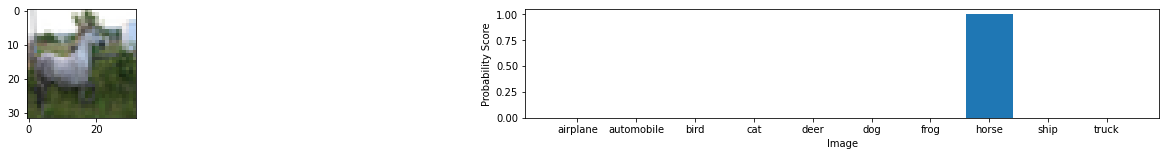

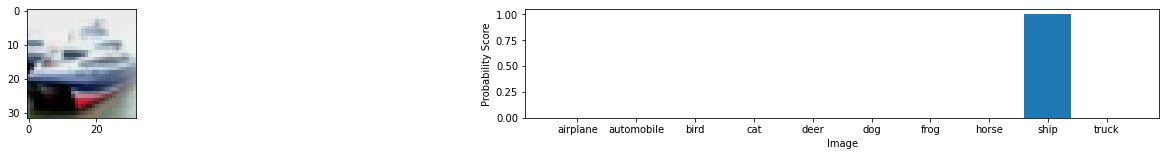

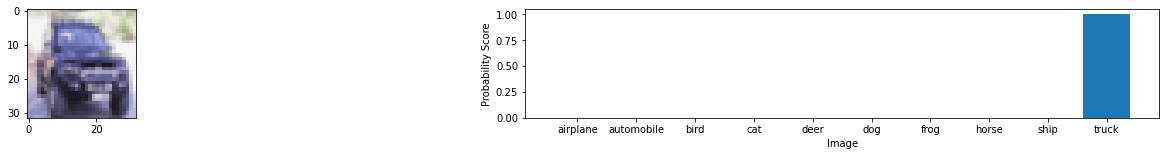

In [ ]:
index = [69, 1, 9]

for i in index:
  predict_image(i, label_dict)